En el dataset de vinos, la razón por la que debemos normalizar los datos antes de aplicar el modelo es porque estamos trabajando con datos que miden diferentes cosas, como la intensidad del color, la alcalinidad, el grado de alcohol, etc, estos son valores que no pueden ser comparados entre sí (es como sumar peras con manzanas) y por eso se debe estandarizar, es decir, aplicar un proceso estadístico que hace que todos los datos se ajusten a una curva de distribución normal y se situen en una misma escala que permita su comparacion, por eso es que el accuracy aumenta desde un 36-37%, hasta un 89%. 

Creo que esto nos deja una lección más de lo importante que es conocer nuestros datos antes empezar a trabajar con ellos

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos informacion de wines
wines = datasets.load_wine()

In [3]:
# Separamos nuestra dataset
X_wines = wines.data
Y_wines = wines.target

In [4]:
# Llevo los datos a una estructura de DataFrame
xw = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
yw = pd.DataFrame(Y_wines, columns = ['Target'])
xw.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.3694075388574537
numero de n_clusters: 3 accurracy 0.37111371823084754
numero de n_clusters: 4 accurracy 0.30289726650864374
numero de n_clusters: 5 accurracy 0.31158801033176253
numero de n_clusters: 6 accurracy 0.29090227688418224
numero de n_clusters: 7 accurracy 0.22632105878612552
numero de n_clusters: 8 accurracy 0.21017469497565422
numero de n_clusters: 9 accurracy 0.18197901068434116
numero de n_clusters: 10 accurracy 0.157531285682156


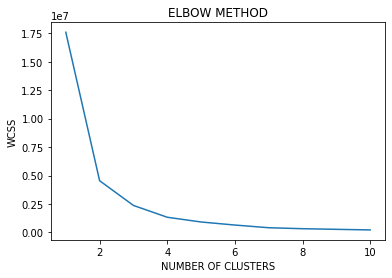

In [6]:
# Ploteo para encontrar el numero de clusters de acuerdo a 
# metodo del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(xw)
    yw_kmeans = kmeans.predict(xw)
    wcss.append(kmeans.inertia_)
    accuracy =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Aplico el modelo de KMeans
modelw = KMeans(n_clusters = 3, max_iter = 1000)
modelw.fit(xw)
yw_labels = modelw.labels_
yw_kmeans = modelw.predict(xw)
print('predicciones ', yw_kmeans)
yw_kmeans_df = pd.DataFrame(yw_kmeans, columns = ['Prediction'])

predicciones  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [8]:
# Precisión del modelo
accuracyw =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
print(accuracyw)


0.37111371823084754


In [9]:
# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([xw, yw_kmeans_df],axis=1)

In [10]:
# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')

Output hidden; open in https://colab.research.google.com to view.